# numpy 初览
--------------------

## 基本操作

In [4]:
import numpy as np
first_arr = np.array([[1., 0., 0.], [0., 1., 2.]])

In [5]:
type(first_arr)

numpy.ndarray

获取对象的属性：

In [12]:
first_arr.dtype, first_arr.size, first_arr.itemsize, first_arr.ndim, first_arr.shape

(dtype('float64'), 6, 8, 2, (2, 3))

In [13]:
first_arr.data

## 创建numpy.ndarray对象

### 直接指定所有的元素

In [16]:
sec_arr = np.array([[1.4,2,3],[3,8,2]])

In [17]:
sec_arr.dtype

dtype('float64')

In [18]:
sec_arr.dtype.name

'float64'

可以手动指定元素类型，比如np.uint8之类

In [19]:
sec_arr = np.array([[1.4,2,3],[3,8,2]], dtype=np.complex)

In [20]:
print(sec_arr)

[[1.4+0.j 2. +0.j 3. +0.j]
 [3. +0.j 8. +0.j 2. +0.j]]


### 使用内建函数生成指定大小的array

In [21]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [22]:
np.ones((4,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

empty()函数生成指定dim的array，内容随机，依赖memory当时的状态，zeros/ones/empty都可以指定dtype

In [23]:
np.empty((3,2), dtype=np.uint8)

array([[0, 0],
       [0, 0],
       [0, 0]], dtype=uint8)

In [24]:
np.arange(0,9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
np.arange(0,9,2)

array([0, 2, 4, 6, 8])

In [26]:
np.arange(0,3,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8])

由于浮点精度的问题，使用arange时指定float类型的step不可靠，可以使用`linspace()`代替，第三个参数代表array元素数量

In [29]:
np.linspace(0,2,11)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [30]:
%matplotlib inline

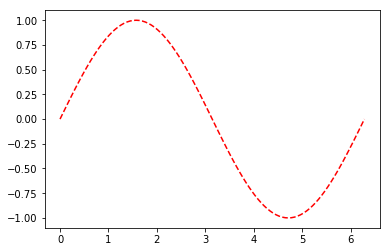

In [32]:
import matplotlib.pyplot as plt
a = np.linspace(0, 2*np.pi, 101)
b = np.sin(a)
plt.plot(a, b, 'r--')

其他的函数有：array, zeros, zeros_like, ones, ones_like, empty, empty_like, arange, linspace, rand, randn, fromfunction, fromfile

## 打印array

打印规则是：最后axis从左向右打印，其他的都是从上往下打印，一簇打印完后用空行分割

In [38]:
a = np.random.randint(0,10, size=(2,3,4))
print(a)

[[[2 1 7 6]
  [6 3 5 5]
  [2 2 4 9]]

 [[9 6 9 6]
  [4 0 8 5]
  [6 7 8 2]]]


In [42]:
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


当数量很多的时候用...省略：

In [44]:
print(np.arange(10000).reshape(100,100))
    

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


## 基础操作

### 一元操作

对于np.ndarray对象来说，基本的比如`+`,`-`,`*`,`**`都是按照对应元素一一操作的：

In [47]:
a = np.arange(4)
b = np.array([2,2,3,3])
a*b

array([0, 2, 6, 9])

In [48]:
a**2

array([0, 1, 4, 9])

矩阵点乘需要用到`dot()`函数：

In [49]:
a = np.array([[1,2],[0,1]])
b = np.array([[2,4,8],[2,0,1]])
a.dot(b)

array([[ 6,  4, 10],
       [ 2,  0,  1]])

同样支持`-=`,`+=`，改变原来的元素，**注意，因为是改变原来的元素，元素类型不能发生变化，所以如果发生从高精度到低精度类型转换，将发生TypeError**

In [51]:
a -= 5
print(a)

[[-4 -3]
 [-5 -4]]


In [55]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
b += a

In [56]:
b

array([[3.29698295, 3.73323008, 3.49164752],
       [3.71931541, 3.26542405, 3.35130333]])

In [57]:
a += b

TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

a+b的dtype是float64，然后返回给a，发生高精度向低精度转换，raise TypeError

对于一般的求和，求最大值最小值等操作，直接调用np.ndarray的函数即可：

In [68]:
a = 100*np.random.random((3,4))
print(a)

[[36.12844747 62.89309631 30.52777828  5.98184295]
 [ 7.97452038 50.83515072  9.55864334 73.10639602]
 [ 5.43338869 68.34251147 34.27000017 47.60644669]]


In [72]:
a.sum(), a.min(), a.max()

(432.65822250696345, 5.433388692242791, 73.10639601569522)

如果指定axis参数，则可以分列/分行求和，求最大最小值

In [73]:
a.sum(axis=0)

array([ 49.53635655, 182.0707585 ,  74.3564218 , 126.69468566])

In [74]:
a.max(axis=1)

array([62.89309631, 73.10639602, 68.34251147])

### 精度转换
当操作符两侧的类型不同时，自动从低精度向高精度转换

In [58]:
a = np.ones(3,dtype=np.int32)
b = np.linspace(0, 2*np.pi, 3)
c = a+b

In [59]:
print(c.dtype, c)

float64 [1.         4.14159265 7.28318531]


## 通用函数--universal function
numpy内置了一些函数:sin(), cos(), exp()，称为通用函数(**ufunc**);这些函数也是逐元素作用，返回一个新array

In [76]:
a = np.arange(3)
b = np.exp(a)
print(b)

[1.         2.71828183 7.3890561 ]


In [78]:
a = np.linspace(0,2*np.pi,20)
b = np.sin(a)
print(b)

[ 0.00000000e+00  3.24699469e-01  6.14212713e-01  8.37166478e-01
  9.69400266e-01  9.96584493e-01  9.15773327e-01  7.35723911e-01
  4.75947393e-01  1.64594590e-01 -1.64594590e-01 -4.75947393e-01
 -7.35723911e-01 -9.15773327e-01 -9.96584493e-01 -9.69400266e-01
 -8.37166478e-01 -6.14212713e-01 -3.24699469e-01 -2.44929360e-16]


## 索引，切片，迭代遍历
一维array和python的list，tuple等序列类似：

In [79]:
a = np.arange(10)
b = a[0:5]
print(b)
a[0:5]=1
print(b)

[0 1 2 3 4]
[1 1 1 1 1]


**说明：b=a[0:5]并没有创建一个新的np.ndarray，b共享a的数据，这里和list, tuple有差别**

In [89]:
name = list('jonahzeng')
dick_name = name[::2]
print(name, dick_name)
name[2]='m'
print(name, dick_name)

['j', 'o', 'n', 'a', 'h', 'z', 'e', 'n', 'g'] ['j', 'n', 'h', 'e', 'g']
['j', 'o', 'm', 'a', 'h', 'z', 'e', 'n', 'g'] ['j', 'n', 'h', 'e', 'g']


**这里说明list的切片是创建一个新的list，数据不共享，deepcopy**

In [84]:
a = np.arange(10)
a[2]

2

In [86]:
a[::2]

array([0, 2, 4, 6, 8])

In [87]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

多维array提供多个索引，索引被包装成tuple的形式：

In [92]:
def f(x,y):
    return 10*x+y
a = np.fromfunction(f, (4,3), dtype=np.int32)
print(a)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [97]:
a[:, 0:2]#第一二列

array([[ 0,  1],
       [10, 11],
       [20, 21],
       [30, 31]], dtype=int32)

In [98]:
a[:, 1]#第二列，但是会被转成一维array

array([ 1, 11, 21, 31], dtype=int32)

In [94]:
a[0,2]#第一行，第三列元素

2

In [95]:
a[0:2, :]

array([[ 0,  1,  2],
       [10, 11, 12]], dtype=int32)

类似于list, str切片，负数也是可以使用的：

In [99]:
a[-1]

array([30, 31, 32], dtype=int32)

In [101]:
a[-1:-3:-1,:]#倒数两行

array([[30, 31, 32],
       [20, 21, 22]], dtype=int32)

省略号`...`也是可以使用的，用在多维array里表示省略：

In [105]:
a = np.arange(120)
a = a.reshape((6,4,5))
print(a)

[[[  0   1   2   3   4]
  [  5   6   7   8   9]
  [ 10  11  12  13  14]
  [ 15  16  17  18  19]]

 [[ 20  21  22  23  24]
  [ 25  26  27  28  29]
  [ 30  31  32  33  34]
  [ 35  36  37  38  39]]

 [[ 40  41  42  43  44]
  [ 45  46  47  48  49]
  [ 50  51  52  53  54]
  [ 55  56  57  58  59]]

 [[ 60  61  62  63  64]
  [ 65  66  67  68  69]
  [ 70  71  72  73  74]
  [ 75  76  77  78  79]]

 [[ 80  81  82  83  84]
  [ 85  86  87  88  89]
  [ 90  91  92  93  94]
  [ 95  96  97  98  99]]

 [[100 101 102 103 104]
  [105 106 107 108 109]
  [110 111 112 113 114]
  [115 116 117 118 119]]]


In [106]:
a[0,...]#等于a[0,:,:]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [107]:
a[0:2,...]#等于a[0:2,:,:]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]]])

迭代遍历，对于多维array来说，迭代的是第一axis：

In [108]:
a = np.arange(60)
a = a.reshape(3,4,5)
print(a)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]
  [30 31 32 33 34]
  [35 36 37 38 39]]

 [[40 41 42 43 44]
  [45 46 47 48 49]
  [50 51 52 53 54]
  [55 56 57 58 59]]]


In [111]:
for row in a:
    print(row)
    print('-'*8)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
--------
[[20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]]
--------
[[40 41 42 43 44]
 [45 46 47 48 49]
 [50 51 52 53 54]
 [55 56 57 58 59]]
--------


如果想遍历每一个元素，使用flat属性：

In [112]:
for ele in a.flat:
    if ele>50:
        print(ele)

51
52
53
54
55
56
57
58
59
